**Regresion logística Dataset Titanic**

In [109]:
#Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [110]:
#Cargamos el dataset y mostramos las 5 primeras filas.
data = pd.read_csv("Titanic-Dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [111]:
data.shape

(891, 12)

In [112]:
valores_por_defecto = {"SibSp" : 0,
                       "Parch" : 0,
                       "Age"   : 20,
                       "Name" : "Desconocido",
                        "Ticket": "PC00",
                        "Cabin":"C85"}
print(data.fillna(value=valores_por_defecto))

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [113]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [114]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

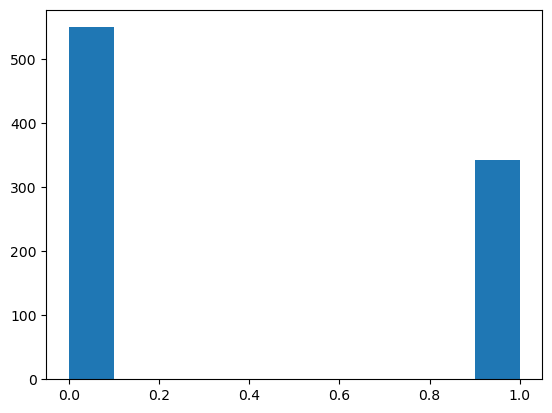

In [115]:
plt.hist(data.Survived)

<Axes: xlabel='Sex', ylabel='Age'>

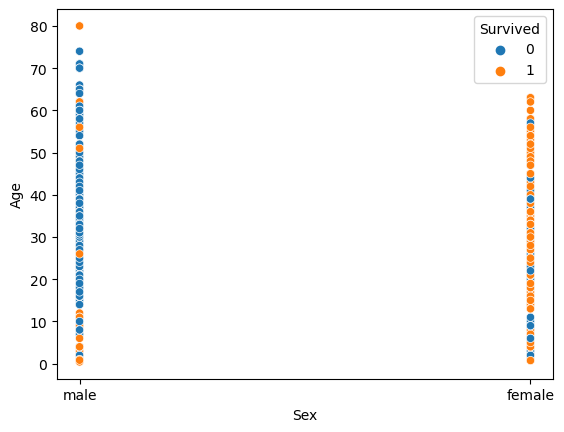

In [116]:
sns.scatterplot(x = "Sex", y="Age", hue = "Survived", data = data)

In [117]:
predictors_col = ["SibSp", "Age", "Parch"]
target_col = ['Survived']

In [118]:
predictors = data[predictors_col]
target = data[target_col]

In [119]:
predictors

,SibSp,Age,Parch
0,1,22.0,0
1,1,38.0,0
2,0,26.0,0
3,1,35.0,0
4,0,35.0,0
...,...,...,...
886,0,27.0,0
887,0,19.0,0
888,1,NaN,2
889,0,26.0,0


In [120]:
target

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [121]:
corr = predictors.corr()
corr

,SibSp,Age,Parch
SibSp,1.000000,-0.308247,0.414838
Age,-0.308247,1.000000,-0.189119
Parch,0.414838,-0.189119,1.000000


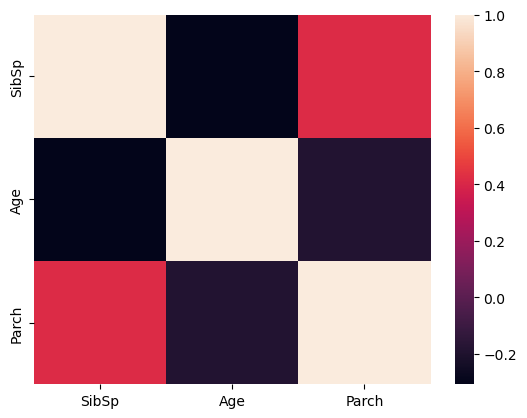

In [122]:
sns.heatmap(corr)
plt.show()

**Conclusiones**
#1. Se comprueba que la cantidad de supervivientes es mayor en el género femenino,
figuras
#2. Los pasajeros del Titanic eran personas jóvenes, el promedio es de 28 años
#3. Haber pagado una tarifa mas alta, no influyo de manera notable en la probabilidad
#de sobrevivir
#4. La relación de los fallecidos son 815 personas y los supervivientes son 494, la
#5. La tarifa media registrada es 33.281, figura 12.
#6. El promedio de edad de las mujeres es menor con respecto a los hombres, 
#7 La eliminación de valores atípicos nos muestra que no existen tarifas negativas y
#edades mayores a 150 años.

